##FIR example   
In this notebook we demonstrate a finite impulse response filter. First we design a filter using a filter program available from rice which has been converted from matlab to pyJvsip code. We then use these filter coeficients and the pyJvsip FIR class to filter some broadband (random actually) data and plot the periodogram of the output of the filter.

#### Low Pass filter Example
Available as matlab code at   
http://dsp.rice.edu/software/fir-and-iir-filter-design-algorithms   
Algorithms in archive file     
http://dsp.rice.edu/sites/dsp.rice.edu/files/software/ParkMcClellansAllPrograms.tar.zip

Module __faffine.py__ is a pyJvsip port of __faffine.m__.    
Note that in matlab (or octave) use something like    
>[h,rs,del_p,del_s] = faffine(M,wp,ws,Kp,Ks,eta_p,eta_s);    

For python a tuple is returned so use either (for instance)
>ans=faffine(M,wp,ws,Kp,Ks,eta_p,eta_s)   

or   

>h,rs,del_p,del_s=faffine(M,wp,ws,Kp,Ks,eta_p,eta_s)


In [1]:
from math import pi
import pyJvsip as pjv
from faffine import *
%matplotlib inline
from matplotlib.pyplot import *
M  =  17;
wp = 0.30*pi;
ws = 0.37*pi;
Kp = 0; Ks = 1; eta_p = .05; eta_s = 0;

In [2]:
x=pjv.create('vview_f',16).randn(5)
y=pjv.create('cvview_f',9).fill(0.0)
#myfft=pjv.FFT('rcfftop_f',(1024,1,0))
y1=x.rcfft

In [3]:
y1.mprint('%.3f')

[ 2.142+0.000i  1.865+0.463i  2.890-0.013i  1.239+0.877i -0.894+0.948i -3.795-2.551i  0.612+1.068i  0.699+1.833i  0.757+0.000i]



Err =    0.097834692392026

Err =    0.051271417642336

Err =    0.033101072692884

Err =    0.023240530588105

Err =    0.009539698939709

Err =    0.005074794491388

Err =    0.000192134543885

Err =    0.000000146572994

Err =    0.000000000000099



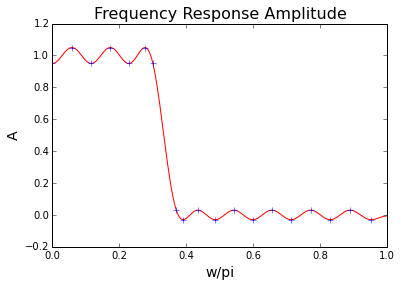

In [4]:
h,rs,del_p,del_s=faffine(M,wp,ws,Kp,Ks,eta_p,eta_s)

In [5]:
fir=pjv.FIR('fir_d',h,pjv.VSIP_NONSYM,1000,1,pjv.VSIP_STATE_NO_SAVE)

In [6]:
x=pjv.create('vview_d',1000).randn(5)
y=pjv.create('vview_d',1000).fill(0)
fir.flt(x,y)

In [7]:
print('%d\n'%fir.lengthOut)

1000



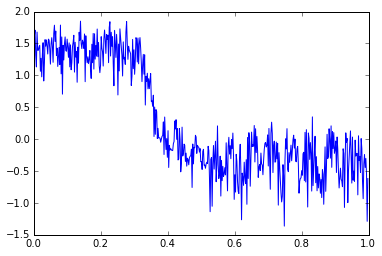

In [8]:
y0=y.rcfft.mag.log10
x0=y0.empty.ramp(0.0,1.0/float(y0.length))
plot(x0.list,y0.list)

### FIR example with all arguments

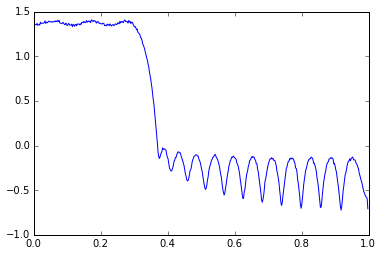

In [9]:
navg=1000
fir=pjv.FIR('fir_d',h,'NONE',1000,1,'NO',0,pjv.VSIP_ALG_SPACE)
x=pjv.create('vview_d',1000).randn(5)
y=pjv.create('vview_d',1000).fill(0)
fir.flt(x,y)
y0=y.rcfft.mag.log10
y0 /=float(navg)
for i in range(navg-1):
    x.randn(5+i)
    fir.flt(x,y)
    y0+=y.rcfft.mag.log10/float(navg)
x0=y0.empty.ramp(0.0,1.0/float(y0.length))
plot(x0.list,y0.list)

#### Band Pass filter Example
Available as matlab code at   
http://dsp.rice.edu/software/fir-and-iir-filter-design-algorithms   
Algorithms in archive file     
http://dsp.rice.edu/sites/dsp.rice.edu/files/software/ParkMcClellansAllPrograms.tar.zip

Module __firebp.py__ is a pyJvsip port of __firebp.m__.    
Note that in matlab (or octave) use something like    
>[h,rs,be] = firebp(n,w1,w2,Del);    

For python a tuple is returned so use either (for instance)
>ans=firebp(n,w1,w2,Del)   

or   

>h,rs,be = firebp(n,w1,w2,Del)


In [10]:
from firebp import *
n   =  23
w1  = 0.14 * 2*pi
w2  = 0.34 * 2*pi
Del = pjv.listToJv('vview_d',[0.01, 0.03, 0.01])

    Err =    2.181382242857770

    Err =    0.954350137398005

    Err =    0.955333116528018

    Err =    0.765607309391694

    Err =    0.046906388419057

    Err =    0.000333543552175

    Err =    0.000000014187167

    Err =    0.000000000000022



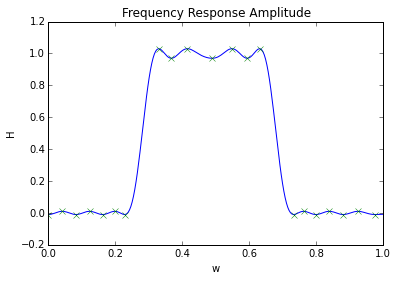

In [11]:
h,rs,be = firebp(n,w1,w2,Del)

#### FIR Example with only required arguments

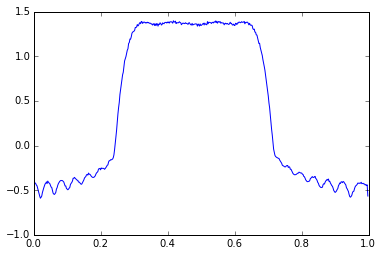

In [12]:
navg=1000
fir=pjv.FIR('fir_d',h,'NONE',1000,1)
x=pjv.create('vview_d',1000).randn(5)
y=pjv.create('vview_d',1000).fill(0)
fir.flt(x,y)
y0=y.rcfft.mag.log10
y0 /=float(navg)
for i in range(navg-1):
    x.randn(5+i)
    fir.flt(x,y)
    y0+=y.rcfft.mag.log10/float(navg)
x0=y0.empty.ramp(0.0,1.0/float(y0.length))
plot(x0.list,y0.list)

#### Filter example using view method
Below we do the example above using the kernel and the view method.

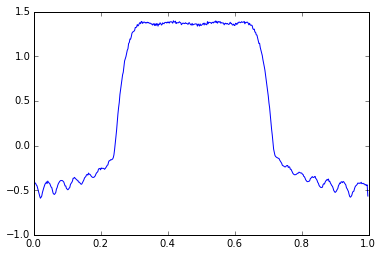

In [13]:
navg=1000
x=pjv.create('vview_d',1000).randn(5)
y=h.firflt(x)
y0=y.rcfft.mag.log10
y0 /=float(navg)
for i in range(navg-1):
    x.randn(5+i)
    y=h.firflt(x)
    y0+=y.rcfft.mag.log10/float(navg)
x0=y0.empty.ramp(0.0,1.0/float(y0.length))
plot(x0.list,y0.list)